In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import mixture
from sklearn.metrics import accuracy_score
from sklearn.metrics.cluster import adjusted_rand_score

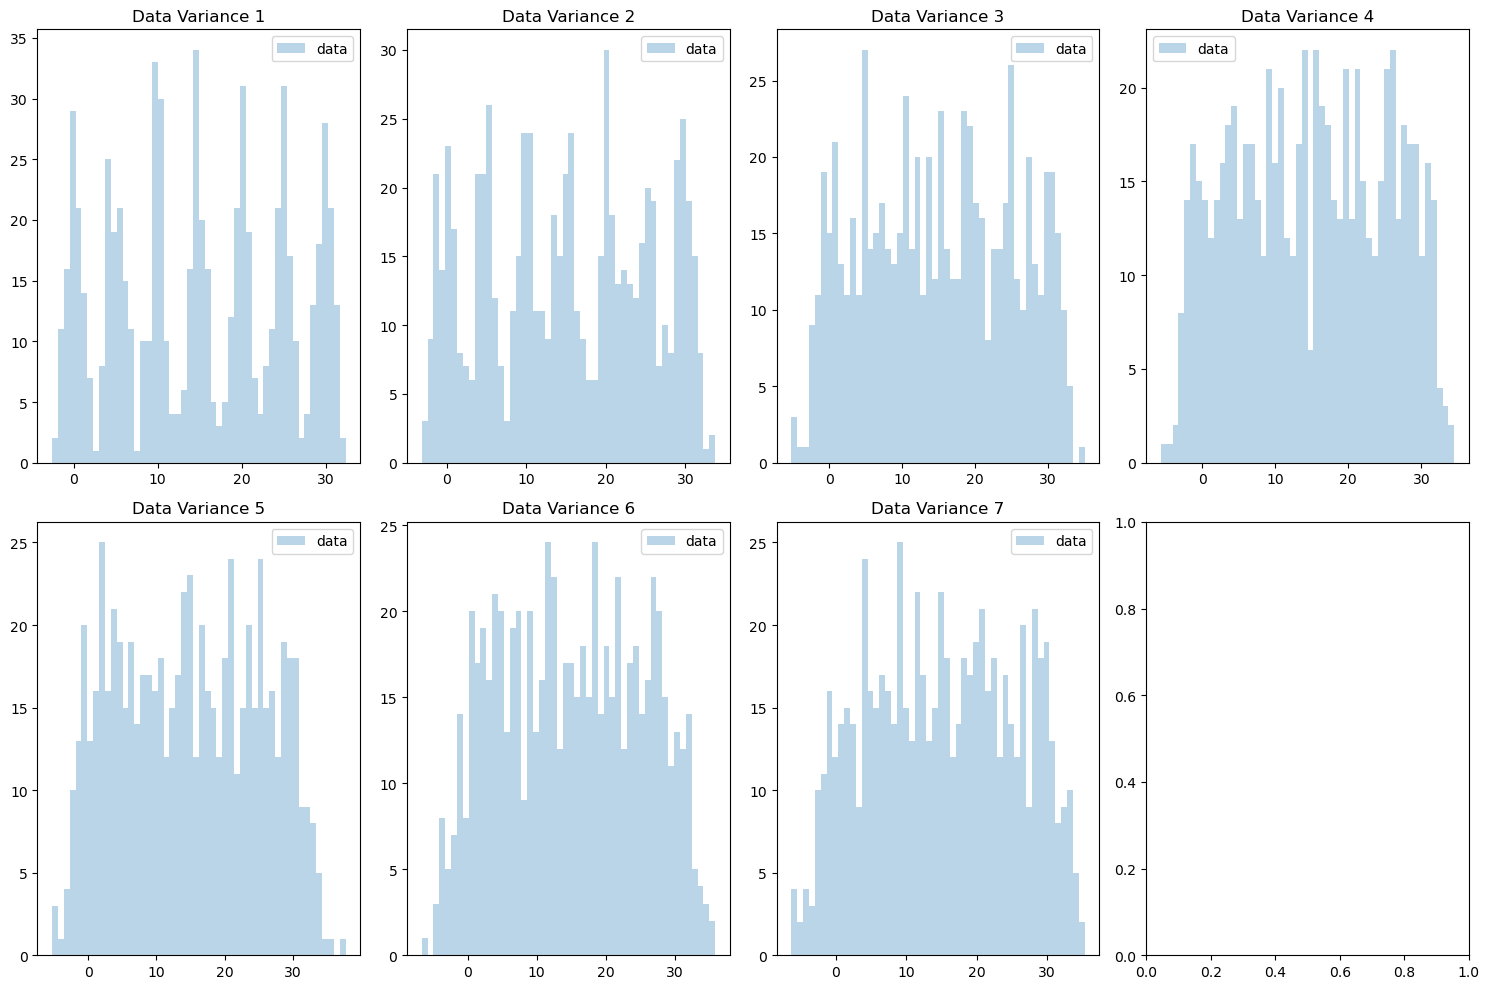

<Figure size 640x480 with 0 Axes>

In [4]:
#Generate one-dimensional data with four different means and the same variance
np.random.seed(0)
n_samples = 700

# Means for the four clusters
means = [0, 5, 10, 15, 20, 25, 30]

# Variance (standard deviation squared) for all clusters
variances = [1, 2, 3, 4, 5, 6, 7]

# Generate samples
datas = []
n_variances = len(variances)
fig, axs = plt.subplots(2, n_variances // 2+1, figsize=(15, 10))
axs = axs.flatten()

for i, variance in enumerate(variances):
    data = []
    for mean in means:
        data.append(np.random.normal(mean, np.sqrt(variance), n_samples // len(means)))

    # Concatenate all data into a single array
    data = np.concatenate(data).reshape(-1,1)
    datas.append(data)

    # Plot the data in the corresponding subplot
    axs[i].hist(data, bins=50, histtype='stepfilled', alpha=0.3, label='data')
    axs[i].set_title(f'Data Variance {variance}')
    axs[i].legend()

# Adjust layout to avoid overlapping
plt.tight_layout()
plt.show()

# Display the plots
plt.tight_layout()
plt.show()

F:\anaconda\envs\transformer\lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
F:\anaconda\envs\transformer\lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
F:\anaconda\envs\transformer\lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
F:\anaconda\envs\transformer\lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memor

Variance:  1
GMM Score:  -3.3358291796513746
Variance:  2
GMM Score:  -3.5051005134991726
Variance:  3
GMM Score:  -3.6020993512459936
Variance:  4
GMM Score:  -3.6154885546886257
Variance:  5
GMM Score:  -3.641003652465357
Variance:  6
GMM Score:  -3.6531299318687185
Variance:  7
GMM Score:  -3.6656518552391635


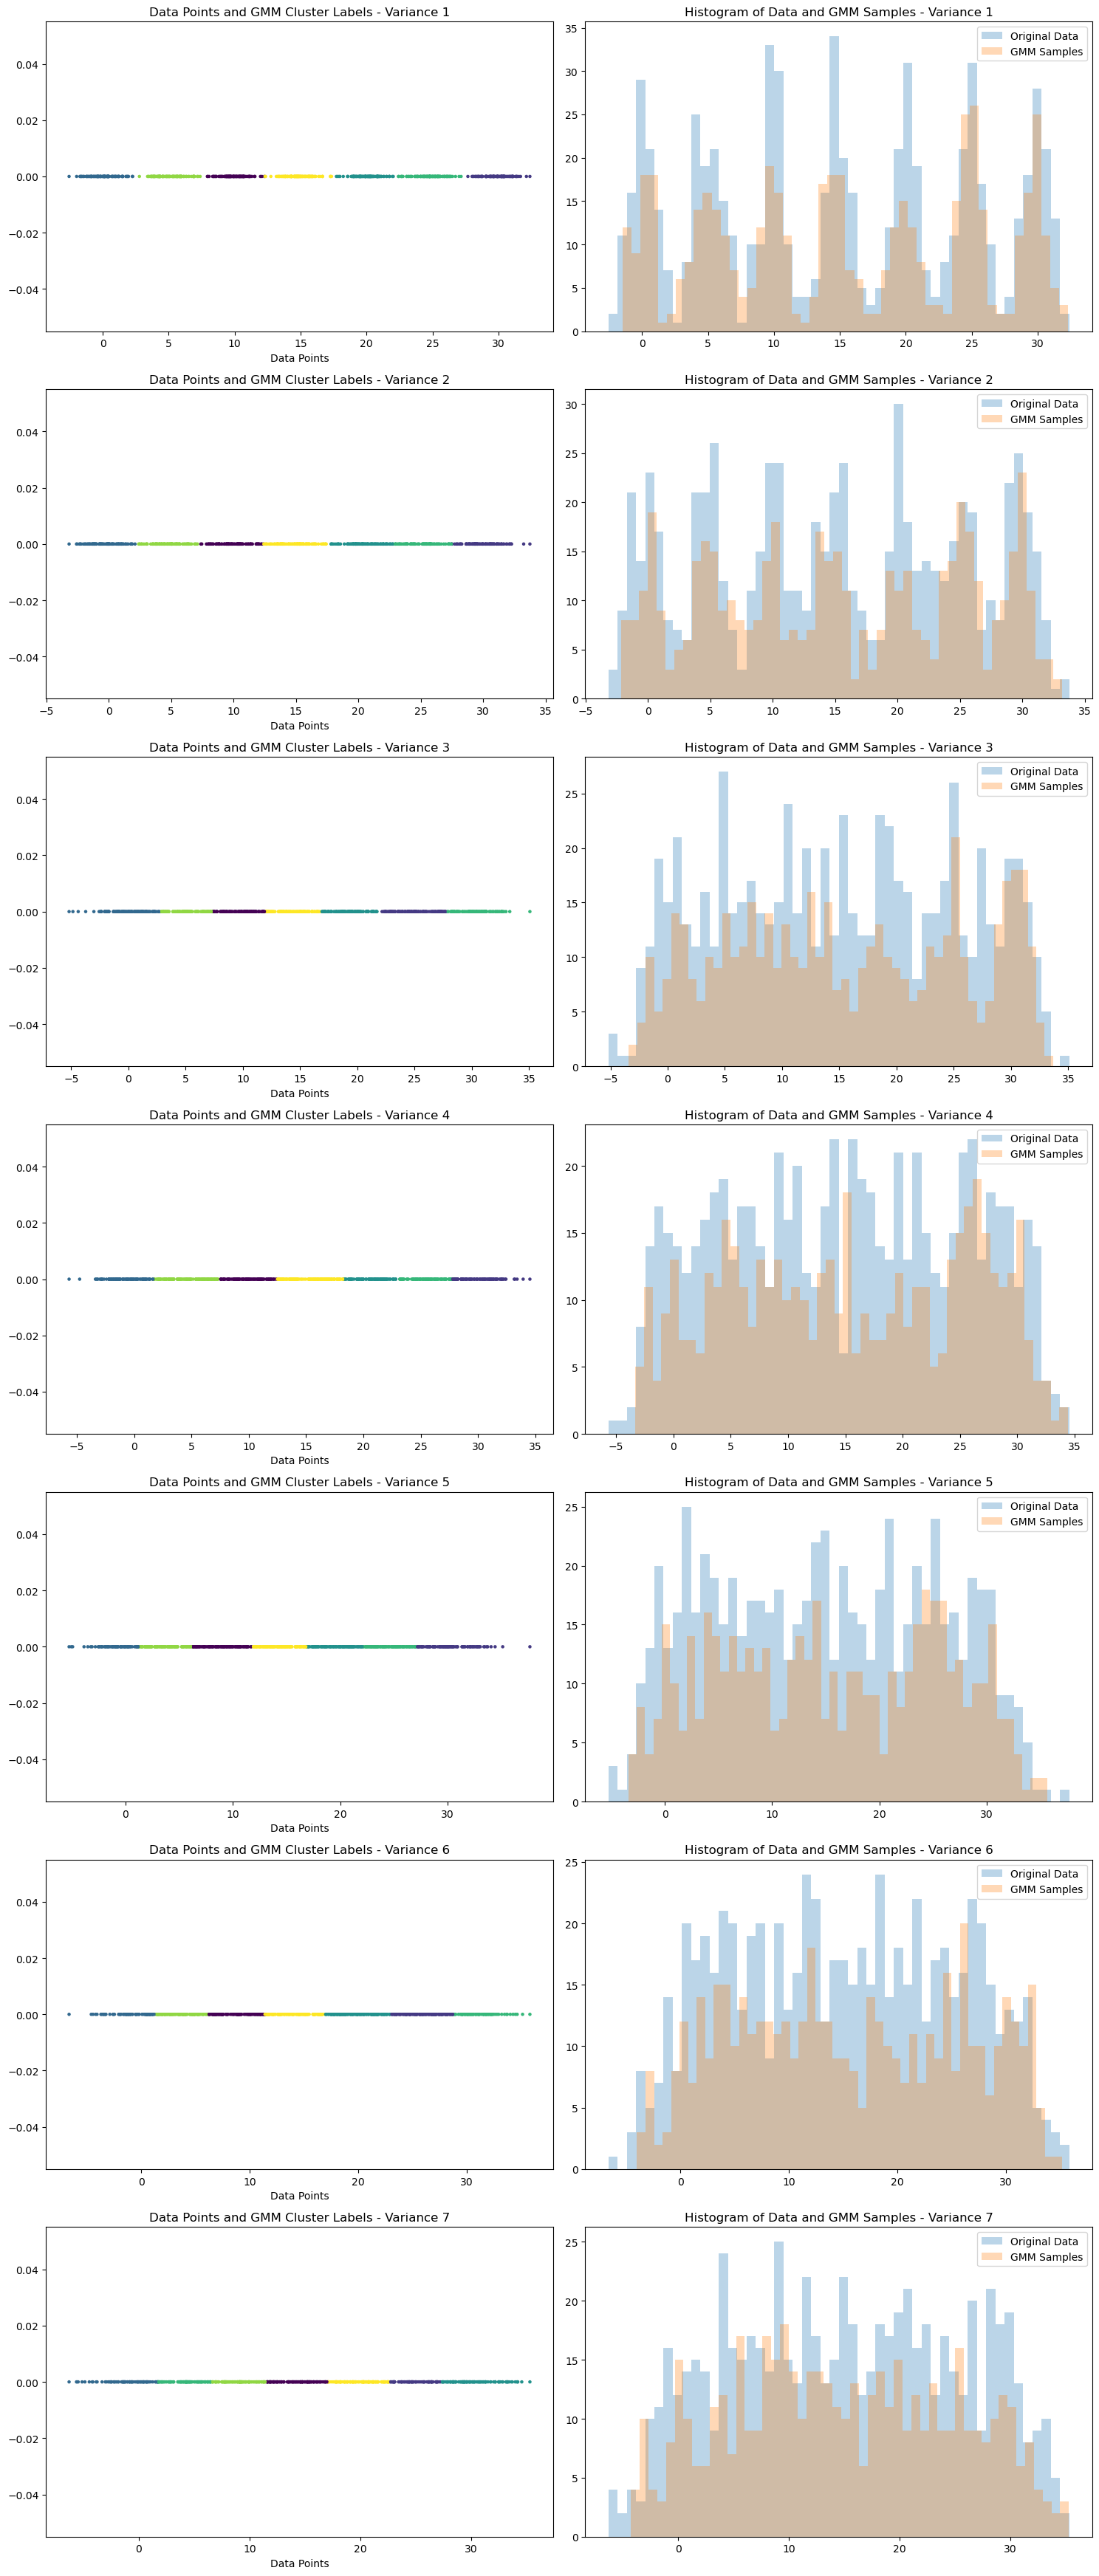

In [14]:
gmms = []
gmm_labels = []
score_gmms = []
prob_gmms = []
prams_gmms = []
stimulation_gmms = []

fig, axs = plt.subplots(n_variances, 2, figsize=(15, 5 * n_variances))

for i, (data, variance) in enumerate(zip(datas, variances)):
    # Fit a Gaussian Mixture Model with seven components
    X = np.array(data)
    gmm = mixture.GaussianMixture(n_components=7, covariance_type="full", random_state=42).fit(X)
    gmm_label = gmm.predict(X)
    score_gmm = gmm.score(X)
    prob_gmm = gmm.predict_proba(X)
    prams_gmm = gmm.get_params(deep=False)
    stimulation_gmm = list(gmm.sample(n_samples=500))

    # Append the results to the lists
    gmms.append(gmm)
    gmm_labels.append(gmm_label)
    score_gmms.append(score_gmm)
    prob_gmms.append(prob_gmm)
    prams_gmms.append(prams_gmm)
    stimulation_gmms.append(stimulation_gmm)

    # Print the results
    print("Variance: ", variance)
    print("GMM Score: ", score_gmm)

    # First subplot for scatter plot with GMM labels
    axs[i, 0].scatter(data, np.zeros_like(data), c=gmm_label, cmap='viridis', s=5)
    axs[i, 0].set_title(f"Data Points and GMM Cluster Labels - Variance {variance}")
    axs[i, 0].set_xlabel("Data Points")

    # Second subplot for histograms
    axs[i, 1].hist(data, bins=50, histtype='stepfilled', alpha=0.3, label='Original Data')
    axs[i, 1].hist(stimulation_gmm[0], bins=50, histtype='stepfilled', alpha=0.3, label='GMM Samples')
    axs[i, 1].set_title(f'Histogram of Data and GMM Samples - Variance {variance}')
    axs[i, 1].legend()

# Adjust the layout to make sure there's no overlap
plt.tight_layout()
plt.show()




F:\anaconda\envs\transformer\lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
F:\anaconda\envs\transformer\lib\site-packages\sklearn\mixture\_base.py:268: ConvergenceWarning: Initialization 1 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.
  warnings.warn(
F:\anaconda\envs\transformer\lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


Number of Predicted Groups:  5
Number of Stimulated Groups:  8
Variance:  1
DPGMM Score:  -3.568581062375632
Number of Predicted Groups:  4
Number of Stimulated Groups:  7
Variance:  2
DPGMM Score:  -3.625930017352873


F:\anaconda\envs\transformer\lib\site-packages\sklearn\mixture\_base.py:268: ConvergenceWarning: Initialization 1 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.
  warnings.warn(
F:\anaconda\envs\transformer\lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
F:\anaconda\envs\transformer\lib\site-packages\sklearn\mixture\_base.py:268: ConvergenceWarning: Initialization 1 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.
  warnings.warn(
F:\anaconda\envs\transformer\lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the e

Number of Predicted Groups:  5
Number of Stimulated Groups:  9
Variance:  3
DPGMM Score:  -3.658500226035199
Number of Predicted Groups:  4
Number of Stimulated Groups:  8
Variance:  4
DPGMM Score:  -3.658989647926745


F:\anaconda\envs\transformer\lib\site-packages\sklearn\mixture\_base.py:268: ConvergenceWarning: Initialization 1 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.
  warnings.warn(
F:\anaconda\envs\transformer\lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
F:\anaconda\envs\transformer\lib\site-packages\sklearn\mixture\_base.py:268: ConvergenceWarning: Initialization 1 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.
  warnings.warn(
F:\anaconda\envs\transformer\lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the e

Number of Predicted Groups:  4
Number of Stimulated Groups:  9
Variance:  5
DPGMM Score:  -3.672875352442883
Number of Predicted Groups:  3
Number of Stimulated Groups:  8
Variance:  6
DPGMM Score:  -3.680071957939323


F:\anaconda\envs\transformer\lib\site-packages\sklearn\mixture\_base.py:268: ConvergenceWarning: Initialization 1 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.
  warnings.warn(
F:\anaconda\envs\transformer\lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
F:\anaconda\envs\transformer\lib\site-packages\sklearn\mixture\_base.py:268: ConvergenceWarning: Initialization 1 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.
  warnings.warn(


Number of Predicted Groups:  5
Number of Stimulated Groups:  8
Variance:  7
DPGMM Score:  -3.6990538829482142


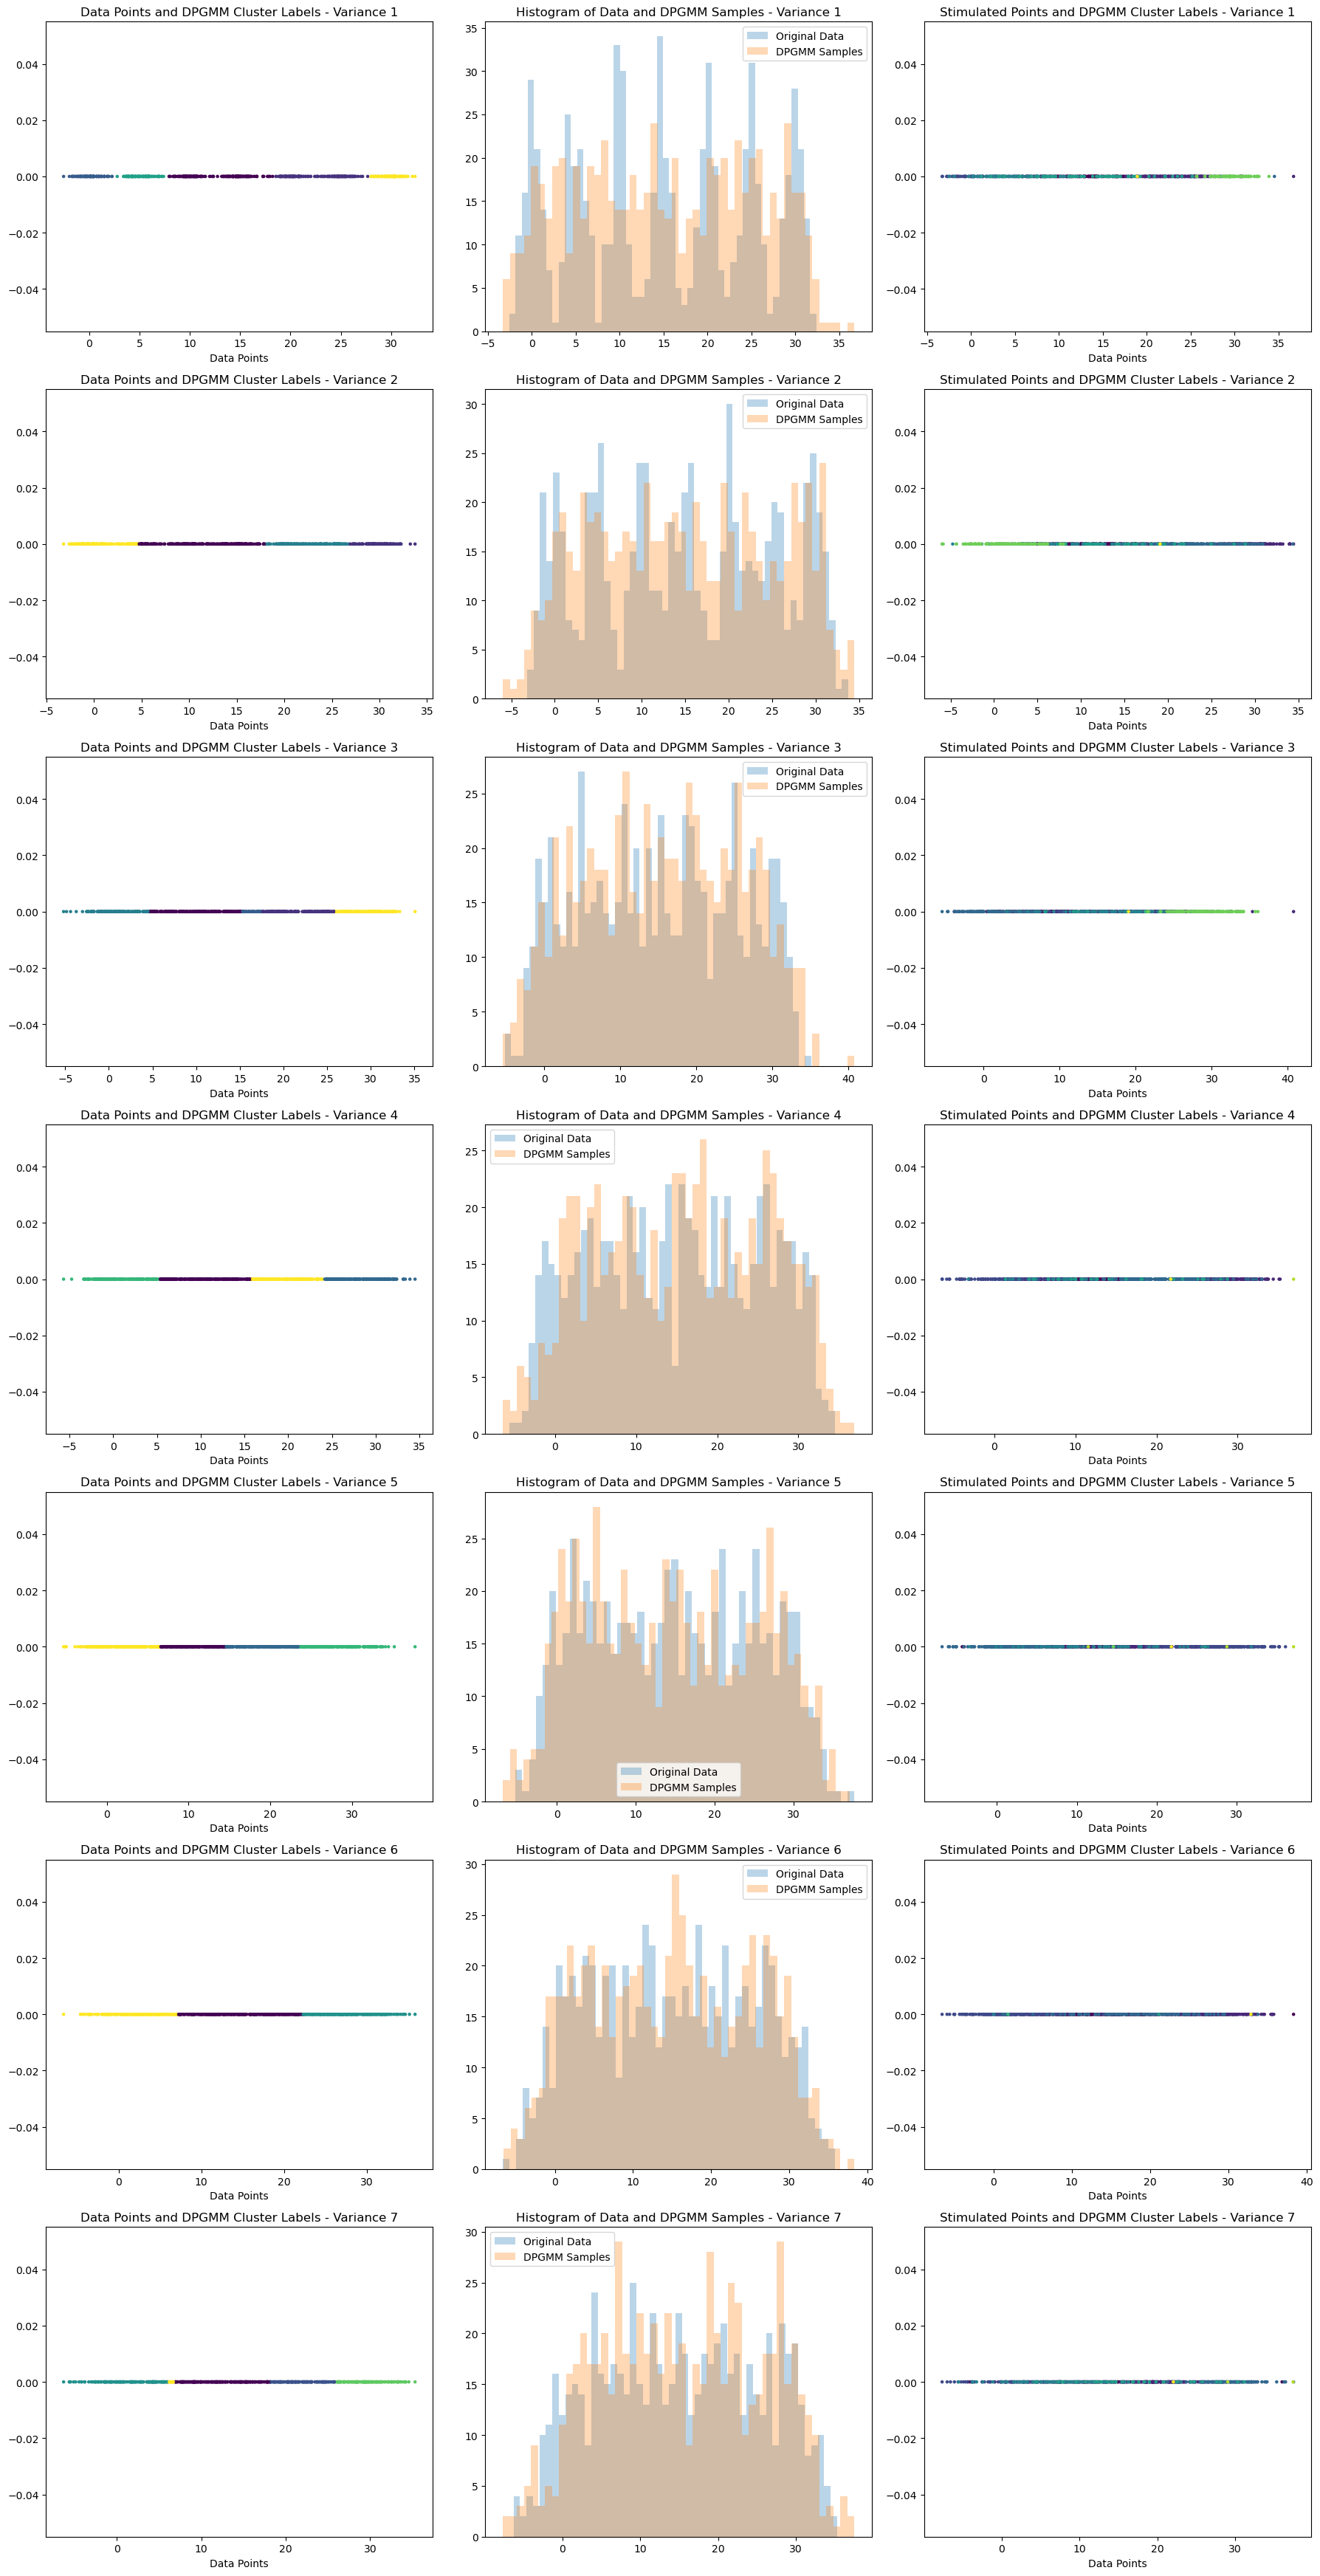

In [8]:
dpgmms = []
score_dpgmms = []
stimulation_dpgmms = []
dpgmm_labels = []
dpgmm_samples = []

fig, axs = plt.subplots(n_variances, 3, figsize=(18, 5 * n_variances))
for i, (data, variance) in enumerate(zip(datas, variances)):
    # Fit a Dirichlet Process Gaussian Mixture Model (DPGMM)
    dpgmm = mixture.BayesianGaussianMixture(
        n_components=10,
        covariance_type="full",
        random_state=42,
        weight_concentration_prior_type="dirichlet_process",
        weight_concentration_prior=1e1,
        mean_precision_prior=0.01,
        mean_prior=np.mean(data).reshape(1,),
        degrees_of_freedom_prior=None,
        covariance_prior=None
    ).fit(data)

    dpgmm_label = dpgmm.predict(data)
    score_dpgmm = dpgmm.score(data)
    dpgmm_sample = dpgmm.sample(n_samples=700)
    dpgmm_samples.append(dpgmm_sample)
    stimulation_dpgmm = list(dpgmm_sample)[0]

    print("Number of Predicted Groups: ", len(np.unique(dpgmm_label)))
    print("Number of Stimulated Groups: ", len(np.unique(list(dpgmm_sample)[1])))

    # Append the results to the lists
    dpgmms.append(dpgmm)
    score_dpgmms.append(score_dpgmm)
    stimulation_dpgmms.append(stimulation_dpgmm)
    dpgmm_labels.append(dpgmm_label)

    # Print the results
    print("Variance: ", variance)
    print("DPGMM Score: ", score_dpgmm)

    # First subplot for the scatter plot with DPGMM labels
    axs[i, 0].scatter(data, np.zeros_like(data), c=dpgmm_label, cmap='viridis', s=5)
    axs[i, 0].set_title(f"Data Points and DPGMM Cluster Labels - Variance {variance}")
    axs[i, 0].set_xlabel("Data Points")

    # Second subplot for histograms of the data and DPGMM samples
    axs[i, 1].hist(data, bins=50, histtype='stepfilled', alpha=0.3, label='Original Data')
    axs[i, 1].hist(stimulation_dpgmm, bins=50, histtype='stepfilled', alpha=0.3, label='DPGMM Samples')
    axs[i, 1].set_title(f'Histogram of Data and DPGMM Samples - Variance {variance}')
    axs[i, 1].legend()

    # Third subplot for the scatter plot of the DPGMM-sampled points with their cluster labels
    axs[i, 2].scatter(dpgmm_sample[0], np.zeros_like(dpgmm_sample[0]), c=dpgmm_sample[1].reshape(-1, 1), cmap='viridis', s=5)
    axs[i, 2].set_title(f"Stimulated Points and DPGMM Cluster Labels - Variance {variance}")
    axs[i, 2].set_xlabel("Data Points")

# Adjust the layout to make sure there's no overlap
plt.tight_layout()
plt.show()

F:\anaconda\envs\transformer\lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


GMM on DPGMM Sample Score:  -3.5797801196215024


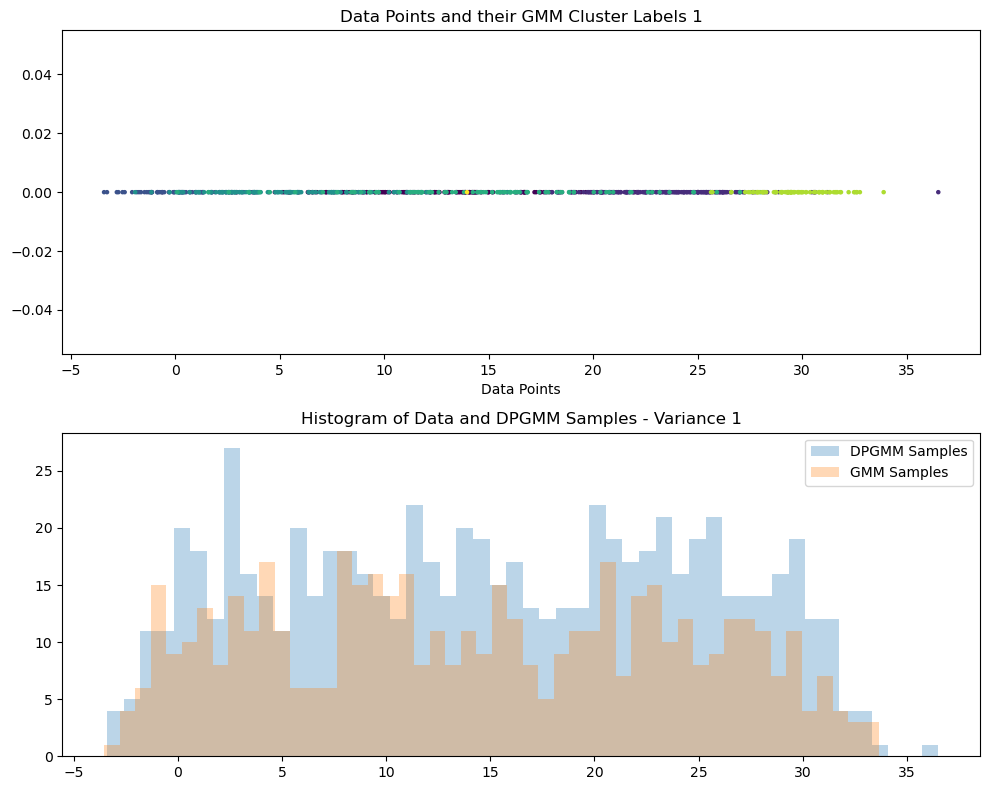

F:\anaconda\envs\transformer\lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


GMM on DPGMM Sample Score:  -3.630781744131302


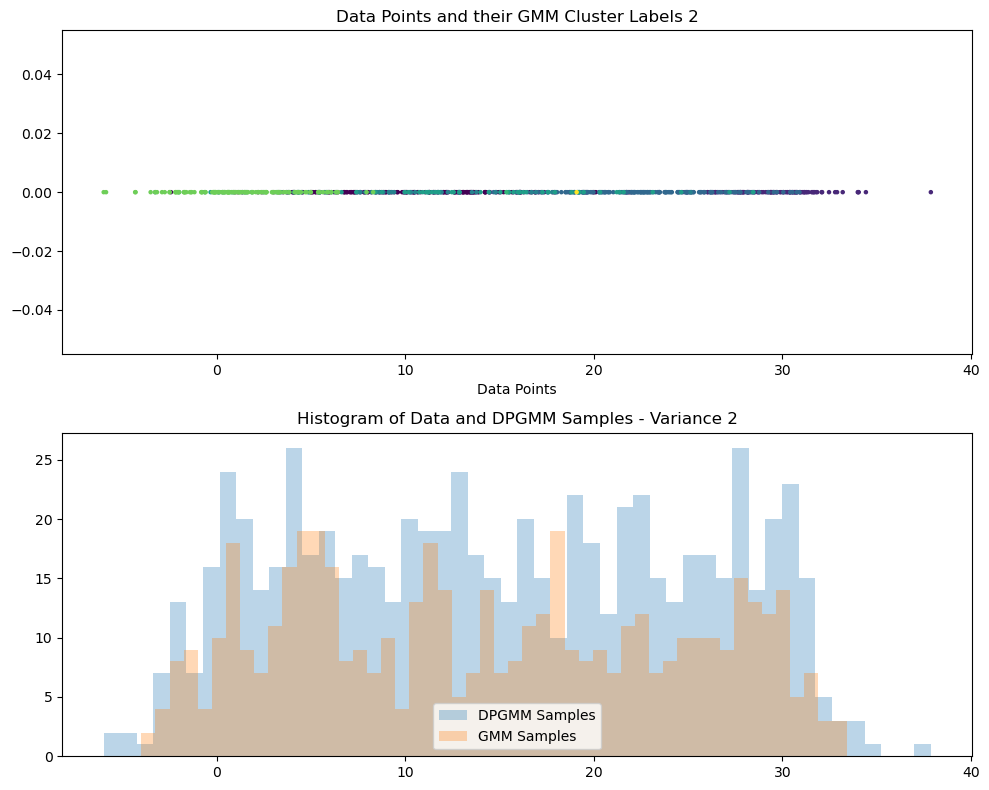

F:\anaconda\envs\transformer\lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


GMM on DPGMM Sample Score:  -3.6645796605424197


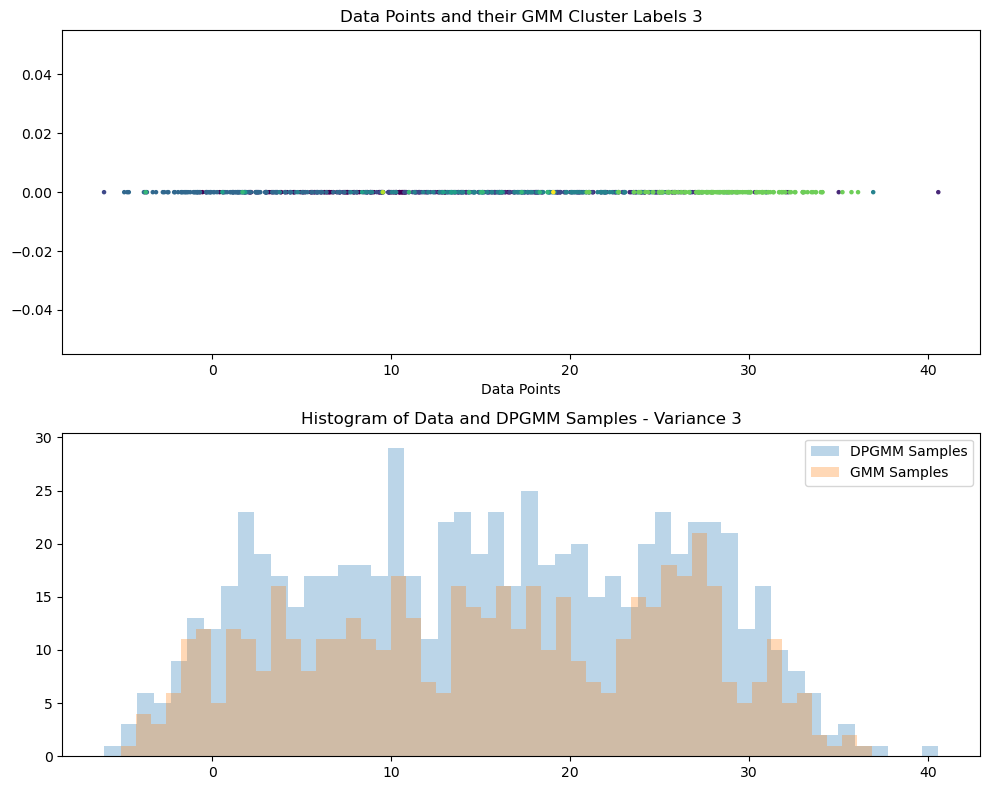

F:\anaconda\envs\transformer\lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


GMM on DPGMM Sample Score:  -3.6440977149379816


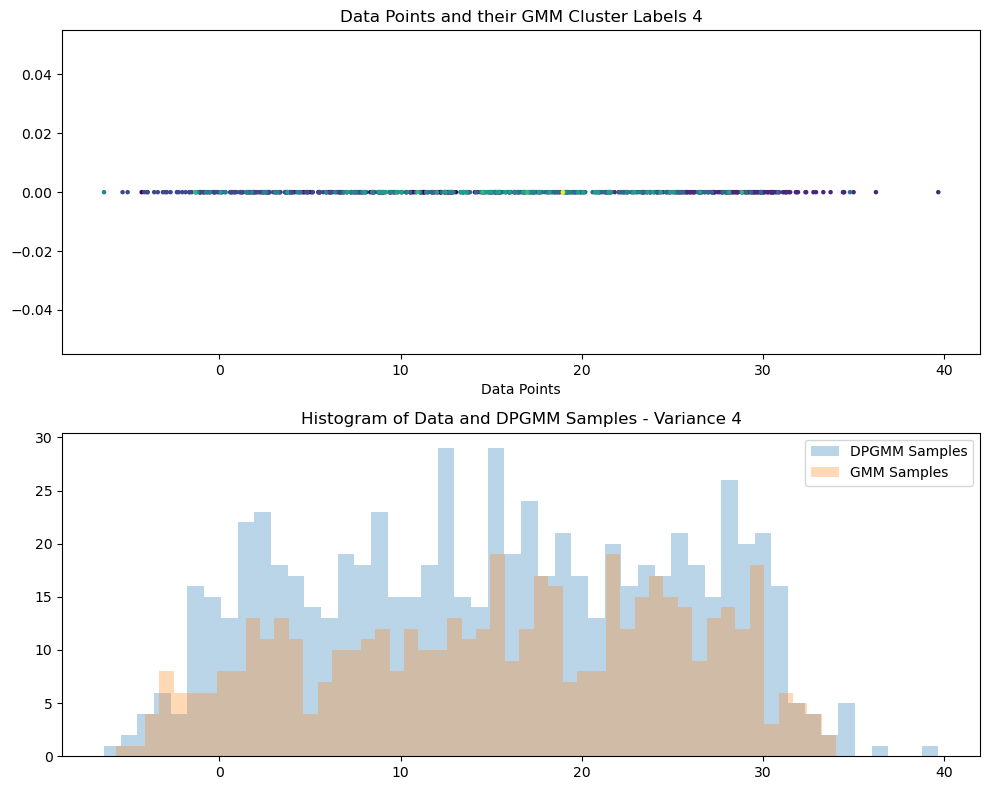

F:\anaconda\envs\transformer\lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


GMM on DPGMM Sample Score:  -3.669902574799133


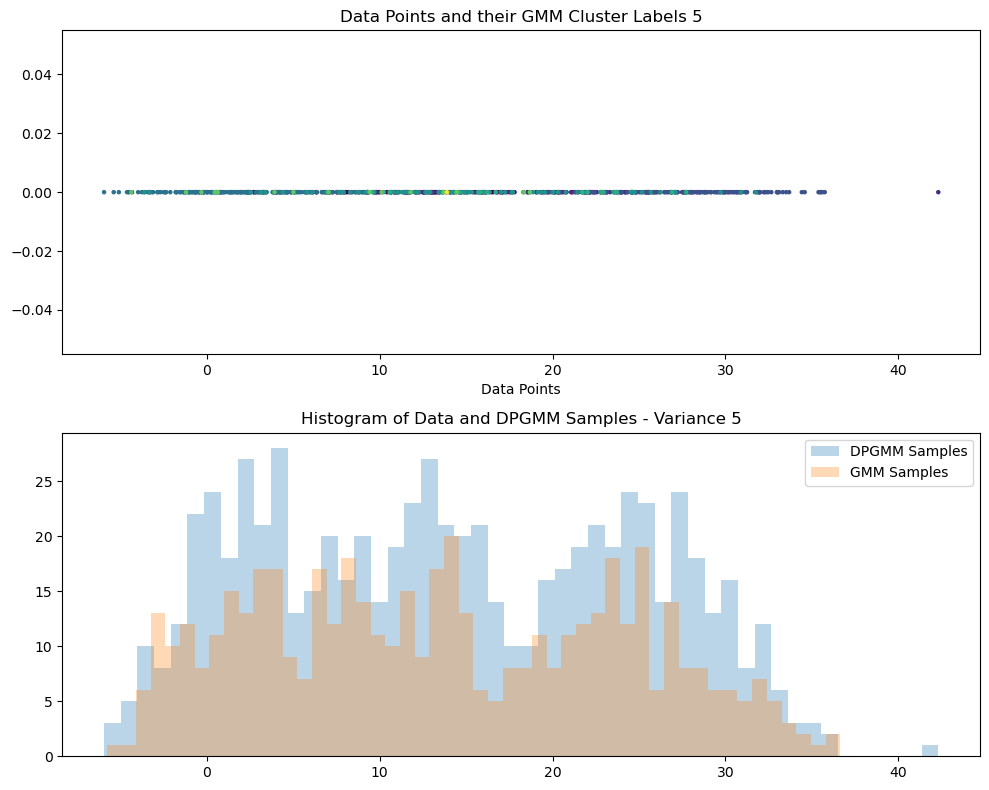

F:\anaconda\envs\transformer\lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


GMM on DPGMM Sample Score:  -3.696009404349686


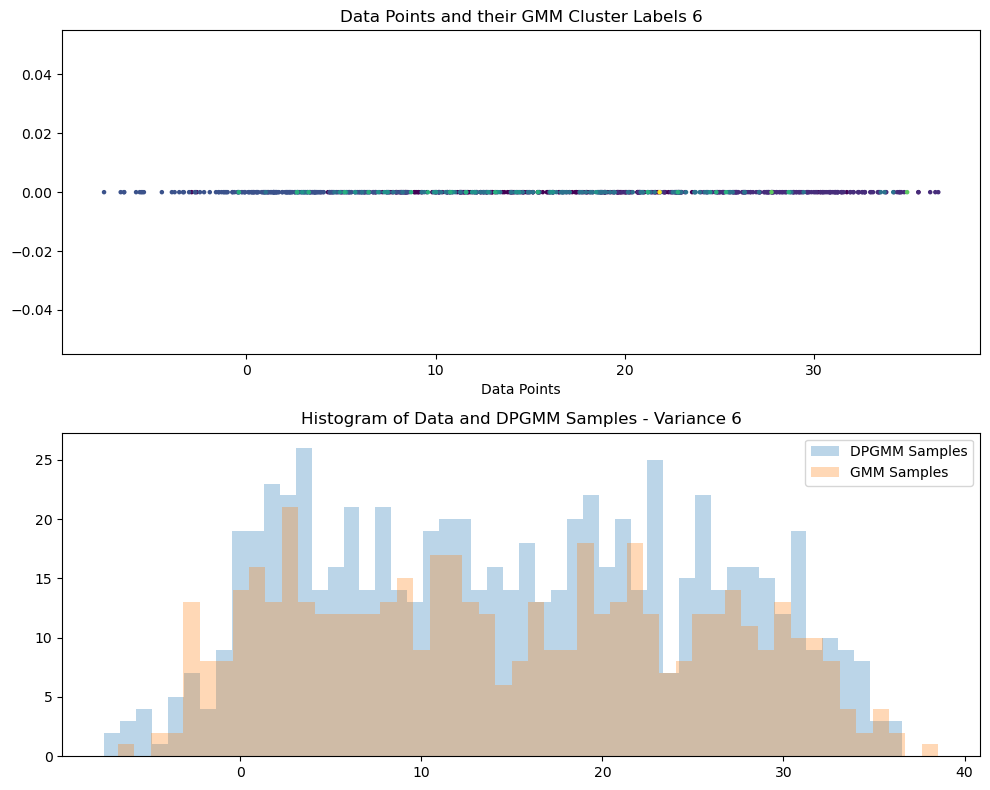

F:\anaconda\envs\transformer\lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


GMM on DPGMM Sample Score:  -3.657596733259697


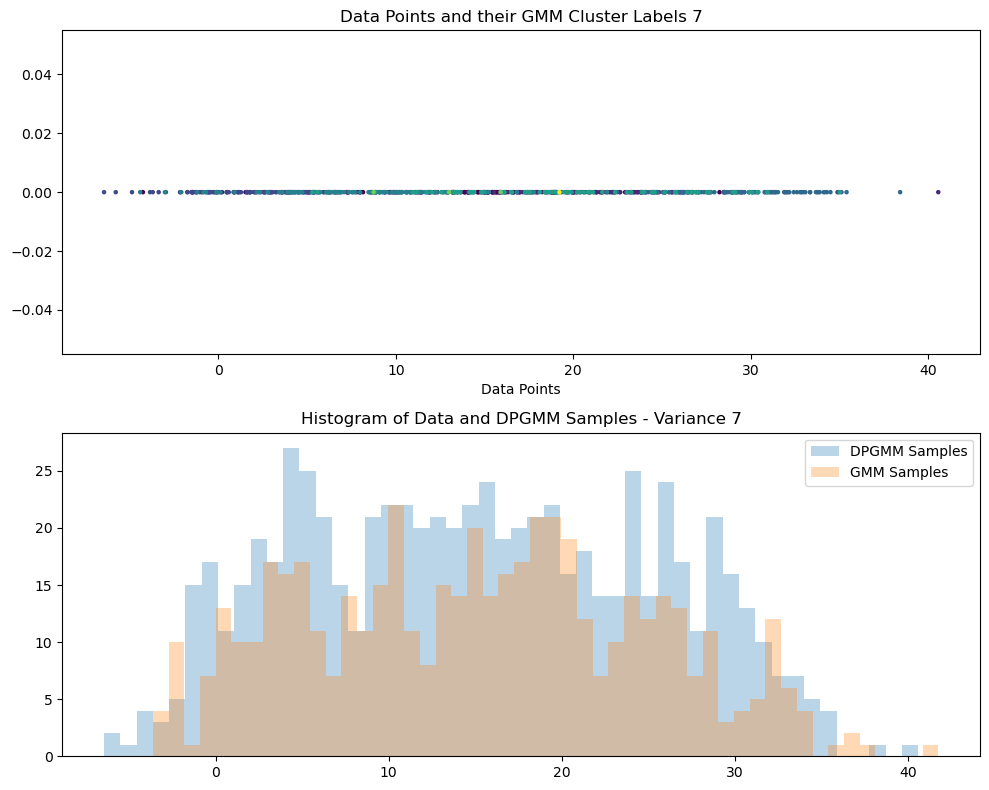

In [6]:
gmms_on_dpgmms = []
score_gmms_on_dpgmms = []
i=1
for sample in dpgmm_samples:

    X_sampled = np.array(list(sample)[0])
    label_sampled = np.array(list(sample)[1])
    gmm_on_dpgmm = mixture.GaussianMixture(n_components=7, covariance_type="full", random_state=42).fit(X_sampled)

    gmm_on_dpgmm_label = gmm_on_dpgmm.predict(X_sampled)
    score_gmm_on_dpgmm = gmm_on_dpgmm.score(X_sampled)
    gmms_on_dpgmms.append(gmm_on_dpgmm)
    score_gmms_on_dpgmms.append(score_gmm_on_dpgmm)
    print("GMM on DPGMM Sample Score: ", score_gmm_on_dpgmm)

    new_stimulation_gmm_on_dpgmm = list(gmm_on_dpgmm.sample(n_samples=500))


    plt.figure(figsize=(10, 8))

    # Create the first subplot for the scatter plot
    plt.subplot(2, 1, 1)  # (rows, columns, panel number)
    plt.scatter(X_sampled, np.zeros_like(X_sampled), c=label_sampled , cmap='viridis', s=5)
    plt.title("Data Points and their GMM Cluster Labels " + str(i))
    plt.xlabel("Data Points")


    # Create the second subplot for the histogram
    plt.subplot(2, 1, 2)
    plt.hist(X_sampled, bins=50, histtype='stepfilled', alpha=0.3, label='DPGMM Samples')
    plt.hist(new_stimulation_gmm_on_dpgmm[0], bins=50, histtype='stepfilled', alpha=0.3, label='GMM Samples')
    plt.title('Histogram of Data and DPGMM Samples - Variance ' + str(i))
    plt.legend()

    # Show the entire plot with both subplots
    plt.tight_layout()  # Adjust the layout to make sure there's no overlap
    plt.show()
    i+=1